In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd 'drive/MyDrive/DD2360/Assignment4/ex_2'

/content/drive/MyDrive/DD2360/Assignment4/ex_2


In [ ]:
!dir

ex2_2nd_2stream.nvvp   ex2.cu		  ex2_stream_4.nvvp
ex2_2nd_4stream.nvvp   ex2.ipynb	  ex2_stream.cu
ex2_2nd_8stream.nvvp   ex2.nvvp		  ex2_stream.out
ex2_2nd.cu	       ex2.out		  untitled
ex2_2nd_nostream.nvvp  ex2.out.nvvp
ex2_2nd.out	       ex2_stream_2.nvvp


In [ ]:
!nvcc --version
!nvidia-smi

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2021 NVIDIA Corporation
Built on Sun_Feb_14_21:12:58_PST_2021
Cuda compilation tools, release 11.2, V11.2.152
Build cuda_11.2.r11.2/compiler.29618528_0
Tue Jan  3 20:54:00 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   68C    P0    28W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |      

In [ ]:
!nvcc -arch=sm_75 ex2_stream.cu -o ex2_stream.out


### Question 1 - compare non-stream and 4 streams


In [ ]:
!./ex2_stream.out 40960000 40960000

The input length is 40960000
The length of each segment is 40960000
The number of segments is 1
Timing - Streamed VecAdd execution time (H2D + Kernel + D2H). 		Elasped 82875 microseconds 
Result is CORRECT


In [ ]:
!./ex2_stream.out 40960000 10240000

The input length is 40960000
The length of each segment is 10240000
The number of segments is 4
Timing - Streamed VecAdd execution time (H2D + Kernel + D2H). 		Elasped 66055 microseconds 
Result is CORRECT


In [ ]:
!./ex2_stream.out 10240000 10240000

The input length is 10240000
The length of each segment is 10240000
The number of segments is 1
Timing - Streamed VecAdd execution time (H2D + Kernel + D2H). 		Elasped 20551 microseconds 
Result is CORRECT


In [ ]:
!./ex2_stream.out 10240000 2560000 

The input length is 10240000
The length of each segment is 2560000
The number of segments is 4
Timing - Streamed VecAdd execution time (H2D + Kernel + D2H). 		Elasped 16673 microseconds 
Result is CORRECT


In [ ]:
!./ex2_stream.out 2560000 2560000 

The input length is 2560000
The length of each segment is 2560000
The number of segments is 1
Timing - Streamed VecAdd execution time (H2D + Kernel + D2H). 		Elasped 5178 microseconds 
Result is CORRECT


In [ ]:
!./ex2_stream.out 2560000 640000  

The input length is 2560000
The length of each segment is 640000
The number of segments is 4
Timing - Streamed VecAdd execution time (H2D + Kernel + D2H). 		Elasped 4269 microseconds 
Result is CORRECT


<ipython-input-28-0957c5175a96>:14: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax.set_xticks(x, labels)


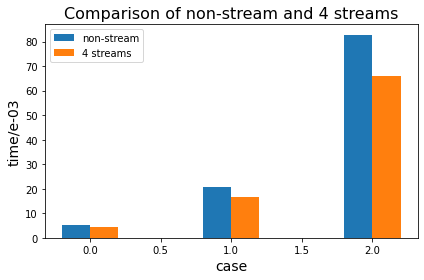

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
non_stream = [5.178 ,20.551 ,82.875]
stream = [4.269 ,16.673 ,66.055 ]
labels = ['0', '1', '2']
x = np.arange(len(labels))
width = 0.2
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, non_stream, width, label='non-stream')
rects2 = ax.bar(x + width/2, stream, width, label='4 streams')
ax.set_ylabel('time/e-03', fontsize=14)
ax.set_xlabel('case', fontsize=14)
ax.set_title('Comparison of non-stream and 4 streams', fontsize=16)
ax.set_xticks(x, labels)
ax.legend()


fig.tight_layout()


In [ ]:
np.divide(non_stream,stream)

array([1.21293043, 1.23259162, 1.25463629])

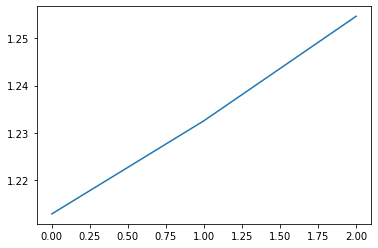

In [ ]:
plt.plot(np.divide(non_stream,stream))

In [ ]:
!./ex2_stream.out 40960000 10240000

The input length is 40960000
The length of each segment is 10240000
The number of segments is 4
Timing - Streamed VecAdd execution time (H2D + Kernel + D2H). 		Elasped 66444 microseconds 
Result is CORRECT


In [ ]:
!nvcc -arch=sm_75 ex2.cu -o ex2.out


In [ ]:
!./ex2.out 40960000

The input length is 40960000.
Time: 0.353141.
CPU and GPU results are equal.


In [ ]:
!nvprof --output-profile ex2_stream.nvvp -f ./ex2_stream.out 40960000 10240000

The input length is 40960000
The length of each segment is 10240000
The number of segments is 4
==10684== NVPROF is profiling process 10684, command: ./ex2_stream.out 40960000 10240000
Timing - Streamed VecAdd execution time (H2D + Kernel + D2H). 		Elasped 66395 microseconds 
Result is CORRECT
==10684== Generated result file: /content/drive/MyDrive/DD2360/Assignment4/ex_2/ex2_stream.nvvp


### Question 3 Impact of number of segment

In [ ]:
!./ex2_stream.out 40960000 20480000

The input length is 40960000
The length of each segment is 20480000
The number of segments is 2
Timing - Streamed VecAdd execution time (H2D + Kernel + D2H). 		Elasped 71161 microseconds 
Result is CORRECT


In [ ]:
!./ex2_stream.out 40960000 10240000

The input length is 40960000
The length of each segment is 10240000
The number of segments is 4
Timing - Streamed VecAdd execution time (H2D + Kernel + D2H). 		Elasped 66109 microseconds 
Result is CORRECT


In [ ]:
!./ex2_stream.out 40960000 5120000

The input length is 40960000
The length of each segment is 5120000
The number of segments is 8
Timing - Streamed VecAdd execution time (H2D + Kernel + D2H). 		Elasped 63920 microseconds 
Result is CORRECT


In [ ]:
!./ex2_stream.out 40960000 2560000

The input length is 40960000
The length of each segment is 2560000
The number of segments is 16
Timing - Streamed VecAdd execution time (H2D + Kernel + D2H). 		Elasped 63425 microseconds 
Result is CORRECT


In [ ]:
!./ex2_stream.out 40960000 1280000

The input length is 40960000
The length of each segment is 1280000
The number of segments is 32
Timing - Streamed VecAdd execution time (H2D + Kernel + D2H). 		Elasped 64140 microseconds 
Result is CORRECT


In [ ]:
!./ex2_stream.out 40960000 640000

The input length is 40960000
The length of each segment is 640000
The number of segments is 64
Timing - Streamed VecAdd execution time (H2D + Kernel + D2H). 		Elasped 66109 microseconds 
Result is CORRECT


In [ ]:
!./ex2_stream.out 40960000 320000

The input length is 40960000
The length of each segment is 320000
The number of segments is 128
Timing - Streamed VecAdd execution time (H2D + Kernel + D2H). 		Elasped 68905 microseconds 
Result is CORRECT


In [ ]:
!./ex2_stream.out 40960000 160000

The input length is 40960000
The length of each segment is 160000
The number of segments is 256
Timing - Streamed VecAdd execution time (H2D + Kernel + D2H). 		Elasped 72169 microseconds 
Result is CORRECT


In [ ]:
!./ex2_stream.out 40960000 80000

The input length is 40960000
The length of each segment is 80000
The number of segments is 512
Timing - Streamed VecAdd execution time (H2D + Kernel + D2H). 		Elasped 82657 microseconds 
Result is INCORRECT


Text(0, 0.5, 'time/e-06')

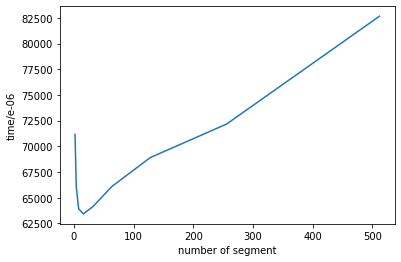

In [ ]:
x = [71161,66109 ,63920, 63425 ,64140 ,66109 ,68905 ,72169 ,82657 ]
y = [2,4,8,16,32,64,128,256,512]
plt.plot(y,x)
plt.xlabel('number of segment')
plt.ylabel('time/e-06')

In [ ]:
!nvcc -arch=sm_75 ex2_2nd.cu -o ex2_2nd.out

In [ ]:
!./ex2_2nd.out 40960000 40960000

The input length is 40960000
The stream size is 40960000
The number of streams is 1
Time is  0.492667.
Result is equal to reference

In [ ]:
!./ex2_2nd.out 40960000 20480000

The input length is 40960000
The stream size is 20480000
The number of streams is 2
Time is  0.489902.
Result is equal to reference

In [ ]:
!./ex2_2nd.out 40960000 20480000

The input length is 40960000
The stream size is 20480000
The number of streams is 2
Time is  0.478956.
Result is equal to reference

In [ ]:
!nvprof --output-profile ex2_2nd_nostream.nvvp -f ./ex2_2nd.out 40960000 40960000

The input length is 40960000
The stream size is 40960000
The number of streams is 1
==5257== NVPROF is profiling process 5257, command: ./ex2_2nd.out 40960000 40960000
Time is  0.486599.
Result is equal to reference==5257== Generated result file: /content/drive/MyDrive/DD2360/Assignment4/ex_2/ex2_2nd_nostream.nvvp


In [ ]:
!nvprof --output-profile ex2_2nd_2stream.nvvp -f ./ex2_2nd.out 40960000 20480000

The input length is 40960000
The stream size is 20480000
The number of streams is 2
==5518== NVPROF is profiling process 5518, command: ./ex2_2nd.out 40960000 20480000
Time is  0.501178.
Result is equal to reference==5518== Generated result file: /content/drive/MyDrive/DD2360/Assignment4/ex_2/ex2_2nd_2stream.nvvp


In [ ]:
!nvprof --output-profile ex2_2nd_4stream.nvvp -f ./ex2_2nd.out 40960000 10240000

The input length is 40960000
The stream size is 10240000
The number of streams is 4
==5569== NVPROF is profiling process 5569, command: ./ex2_2nd.out 40960000 10240000
Time is  0.480173.
Result is equal to reference==5569== Generated result file: /content/drive/MyDrive/DD2360/Assignment4/ex_2/ex2_2nd_4stream.nvvp


In [ ]:
!nvprof --output-profile ex2_2nd_8stream.nvvp -f ./ex2_2nd.out 40960000 5120000

The input length is 40960000
The stream size is 5120000
The number of streams is 8
==5672== NVPROF is profiling process 5672, command: ./ex2_2nd.out 40960000 5120000
Time is  0.490289.
==5672== Generated result file: /content/drive/MyDrive/DD2360/Assignment4/ex_2/ex2_2nd_8stream.nvvp
Result is equal to reference

In [ ]:
!nvprof --output-profile ex2_stream_2.nvvp -f ./ex2_stream.out 40960000 20480000

The input length is 40960000
The stream size is 20480000
The number of streams is 2
==902== NVPROF is profiling process 902, command: ./ex2_stream.out 40960000 20480000
Time is  0.347990.
==902== Generated result file: /content/drive/MyDrive/DD2360/Assignment4/ex_2/ex2_stream_2.nvvp
Result is equal to reference

In [ ]:
!nvprof --output-profile ex2_stream_4.nvvp -f ./ex2_stream.out 40960000 10240000

The input length is 40960000
The stream size is 10240000
The number of streams is 4
==983== NVPROF is profiling process 983, command: ./ex2_stream.out 40960000 10240000
Time is  0.346740.
==983== Generated result file: /content/drive/MyDrive/DD2360/Assignment4/ex_2/ex2_stream_4.nvvp
Result is equal to reference